In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-06-01 13:02:56--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.128, 74.125.203.128, 74.125.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  24.8MB/s    in 6.8s    

2023-06-01 13:03:03 (21.1 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:
import zipfile

local_zip='/content/horse-or-human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()


In [3]:
import os

train_horse_dir=os.path.join('/content/horse-or-human/horses')
train_human_dir=os.path.join('/content/horse-or-human/humans')

In [5]:
train_horse_names=os.listdir(train_horse_dir)
train_human_names=os.listdir(train_human_dir)
print(train_horse_names)
print(train_human_names)

['horse43-0.png', 'horse11-0.png', 'horse34-5.png', 'horse46-5.png', 'horse04-0.png', 'horse35-4.png', 'horse23-4.png', 'horse34-7.png', 'horse29-4.png', 'horse10-8.png', 'horse18-1.png', 'horse49-2.png', 'horse08-9.png', 'horse46-2.png', 'horse12-8.png', 'horse16-5.png', 'horse24-2.png', 'horse47-1.png', 'horse34-8.png', 'horse07-0.png', 'horse43-9.png', 'horse50-7.png', 'horse27-9.png', 'horse07-9.png', 'horse21-2.png', 'horse12-0.png', 'horse47-7.png', 'horse33-4.png', 'horse30-9.png', 'horse32-3.png', 'horse01-6.png', 'horse28-8.png', 'horse45-2.png', 'horse31-7.png', 'horse06-8.png', 'horse15-4.png', 'horse27-2.png', 'horse07-5.png', 'horse41-7.png', 'horse18-5.png', 'horse37-6.png', 'horse13-5.png', 'horse32-4.png', 'horse45-9.png', 'horse37-3.png', 'horse08-1.png', 'horse24-5.png', 'horse06-2.png', 'horse28-3.png', 'horse30-5.png', 'horse10-6.png', 'horse35-5.png', 'horse15-3.png', 'horse46-7.png', 'horse43-6.png', 'horse08-8.png', 'horse31-0.png', 'horse23-9.png', 'horse23-7.pn

In [8]:
print("Total number of horse samples: ",len(train_horse_names))
print("Total number of human samples: ",len(train_human_names))

Total number of horse samples:  500
Total number of human samples:  527


In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows=4
ncols=4
pic_index=0

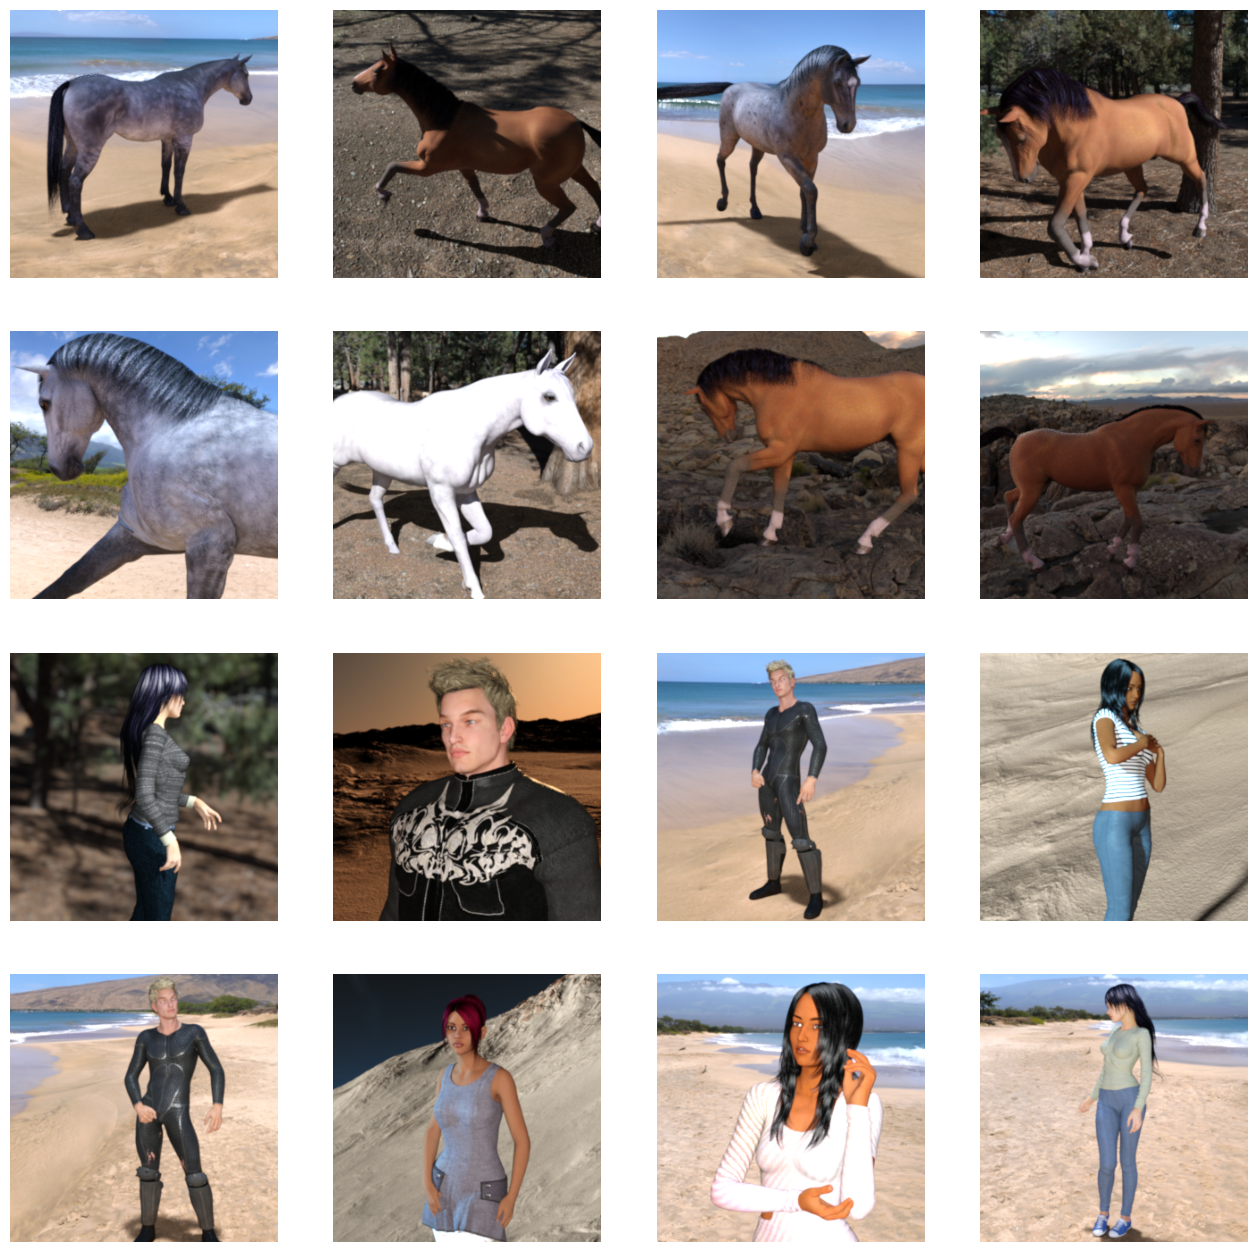

In [11]:
#displaying a batch of 8 horses and 8 humans
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)

pic_index+=8
next_horse_pic=[os.path.join(train_horse_dir,fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pic=[os.path.join(train_human_dir,fname) for fname in train_human_names[pic_index-8:pic_index]]

for i,img_path in enumerate(next_horse_pic+next_human_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [12]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [13]:
#Building the classifier
model=Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),

    Dense(512,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [16]:
#Data Preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator=train_datagen.flow_from_directory(
    './horse-or-human/',  # This is the source directory for training images
    target_size=(300,300),
    batch_size=128,
     # Since we used binary_crossentropy loss, we need binary labels
    class_mode='binary'
)


Found 1027 images belonging to 2 classes.


In [17]:
history=model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1
)

Epoch 1/15
8/8 [==============================] - 122s 15s/step - loss: 0.6881 - accuracy: 0.5161
Epoch 2/15
8/8 [==============================] - 120s 15s/step - loss: 0.7405 - accuracy: 0.5938
Epoch 3/15
8/8 [==============================] - 104s 13s/step - loss: 0.5799 - accuracy: 0.7508
Epoch 4/15
8/8 [==============================] - 102s 15s/step - loss: 0.3415 - accuracy: 0.8632
Epoch 5/15
8/8 [==============================] - 109s 13s/step - loss: 0.4805 - accuracy: 0.8576
Epoch 6/15
8/8 [==============================] - 103s 12s/step - loss: 0.2204 - accuracy: 0.9110
Epoch 7/15
8/8 [==============================] - 100s 12s/step - loss: 0.3952 - accuracy: 0.8598
Epoch 8/15
8/8 [==============================] - 101s 12s/step - loss: 0.1993 - accuracy: 0.9277
Epoch 9/15
8/8 [==============================] - 97s 12s/step - loss: 0.2238 - accuracy: 0.9088
Epoch 10/15
8/8 [==============================] - 89s 11s/step - loss: 0.1537 - accuracy: 0.9433
Epoch 11/15
8/8 [====

In [19]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img) #Keras uses the img_to_array function to convert the PIL image into numpy array
  x /= 255
  x = np.expand_dims(x, axis=0) #adding a dimension that indicates 2D array

  images = np.vstack([x]) #vertically stacking multiple images
  classes = model.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving horse-ga6c4cbd5c_1280.jpg to horse-ga6c4cbd5c_1280.jpg
1/1 [==============================] - 0s 88ms/step
[0.00054117]
horse-ga6c4cbd5c_1280.jpg is a horse


1/1 [==============================] - 0s 333ms/step


<ipython-input-20-3501e75cf878>:45: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


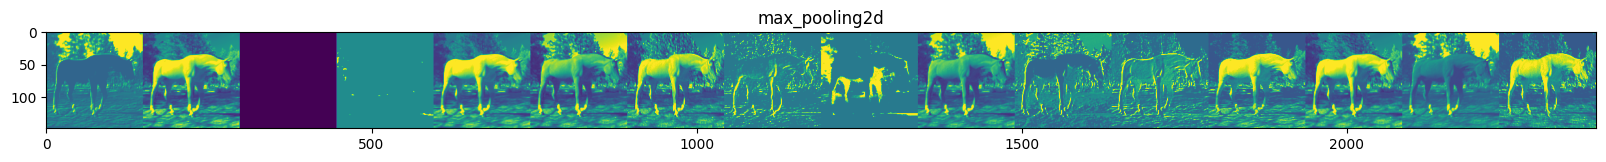

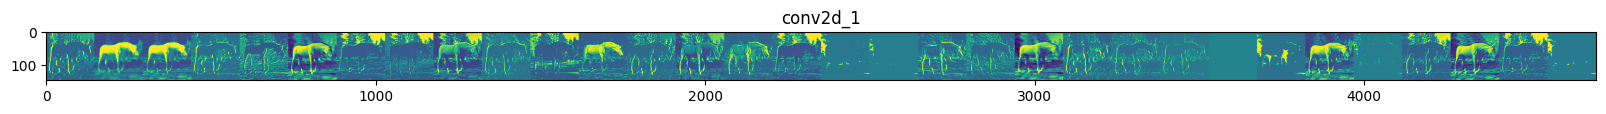

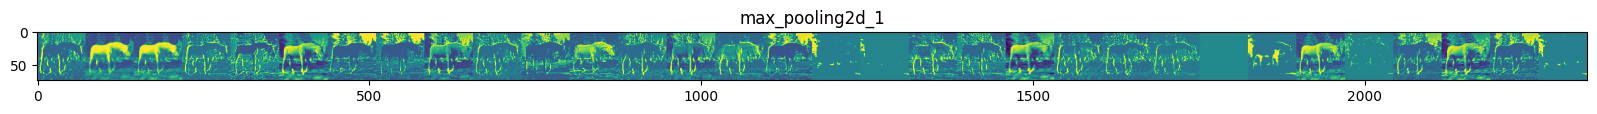

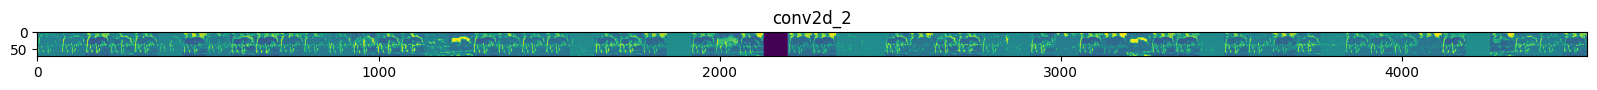

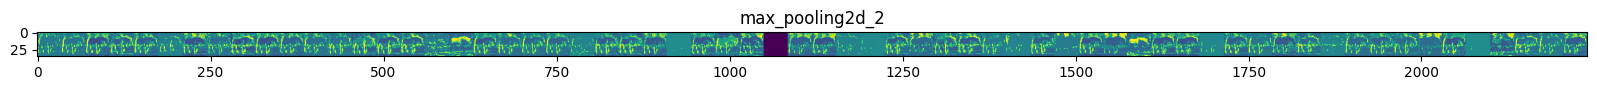

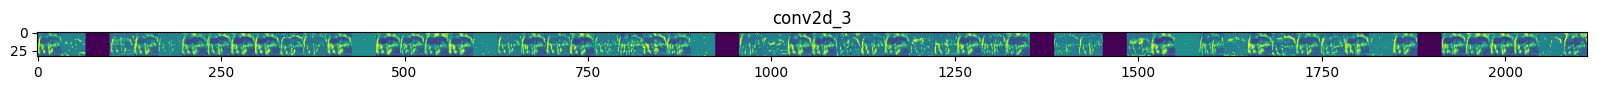

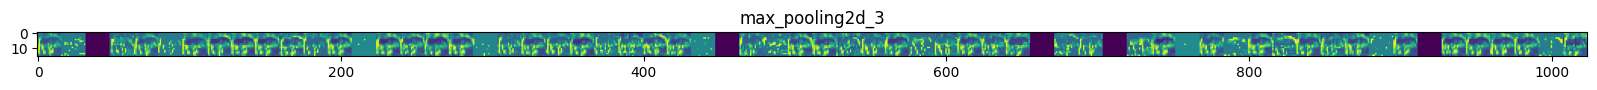

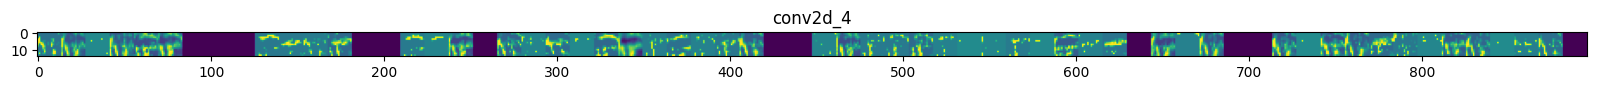

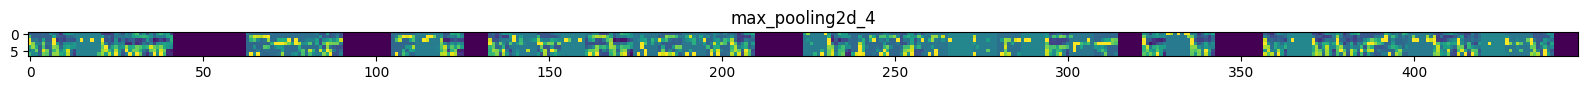

In [20]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

You can see above how the pixels highlighted turn to increasingly abstract and compact representations, especially at the bottom grid. 

The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called _representation sparsity_ and is a key feature of deep learning. These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline wherein each layer filters out the most useful features.